## Quickly Start

In [2]:
#导入需要的库
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()  
import matplotlib.pyplot as plt

#配置jupyter notebook
%matplotlib inline
%config InlineBackend.figure_format = "retina"

#导入数据
train_df  = pd.read_csv("./data/titanic/train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
gender = {'male': 0,'female': 1}
train_df.Sex = train_df['Sex'].map(gender)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [4]:
features= ['Sex']
X_train = train_df[features].values.reshape(-1,1) # 转成二维矩阵
#X_train = train_df[features]
Y_train = train_df["Survived"]
print("shape of X_train",X_train.shape)
print("Shape of Y_train",Y_train.shape)

shape of X_train (891, 1)
Shape of Y_train (891,)


In [5]:
X_train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [6]:
from sklearn.linear_model import LogisticRegression

clf= LogisticRegression()

clf.fit(X_train, Y_train.ravel())

print(clf.score(X_train, Y_train))

0.7867564534231201


In [7]:
test_df  = pd.read_csv("./data/titanic/test.csv")
test_df.Sex = [gender[item] for item in test_df.Sex]
test_df.head()
X_test = test_df['Sex'].values.reshape(-1,1)
print("shape of X_test",X_test.shape)

shape of X_test (418, 1)


In [8]:
predictions= clf.predict(X_test)

In [9]:
submission= pd.DataFrame({'PassengerId' : test_df['PassengerId'], 'Survived': predictions })
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [20]:
submission.to_csv('data/submission.csv',index=False)

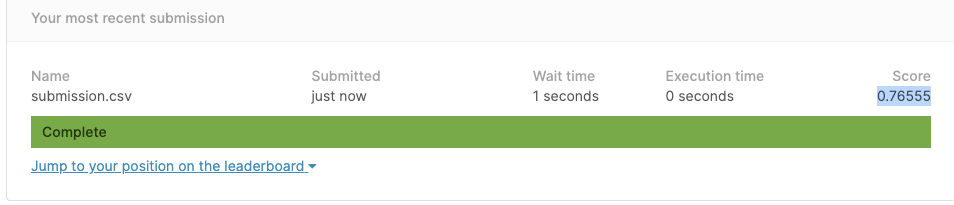

## 洞察数据

<AxesSubplot:>

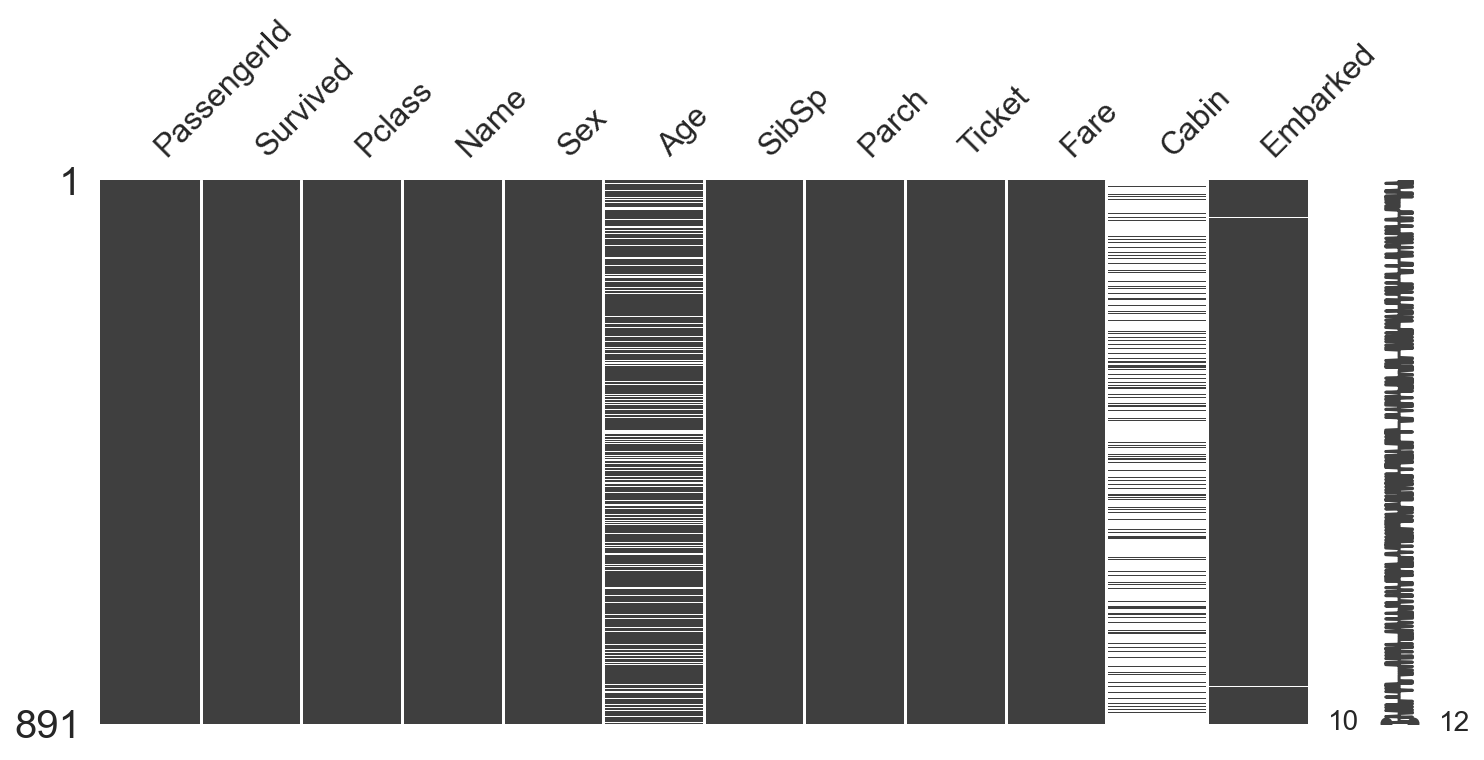

In [4]:
import missingno as msno
msno.matrix(titanic_df,figsize=(12,5))

## 分析数据

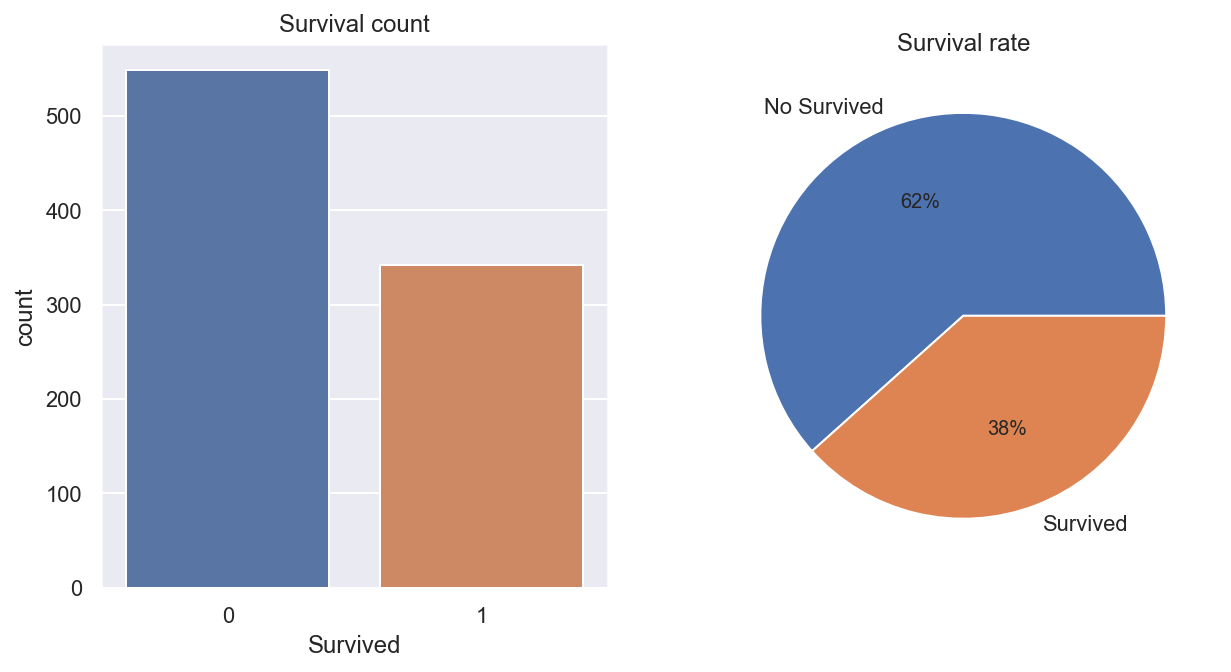

In [84]:
total_survived= titanic_df['Survived'].sum()
total_no_survived = 891 - total_survived

plt.figure(figsize = (10,5))#创建画布
plt.subplot(121)#添加第1个子图
sns.countplot(x='Survived', data=titanic_df)
plt.title('Survival count')

plt.subplot(122)#添加第2个子图
plt.pie([total_no_survived, total_survived],labels=['No Survived','Survived'],autopct='%1.0f%%')
plt.title('Survival rate') 

plt.show()

In [85]:
titanic_df.pivot_table(values="Survived",index="Sex",aggfunc=np.mean)

,Survived
Sex,
female,0.742038
male,0.188908


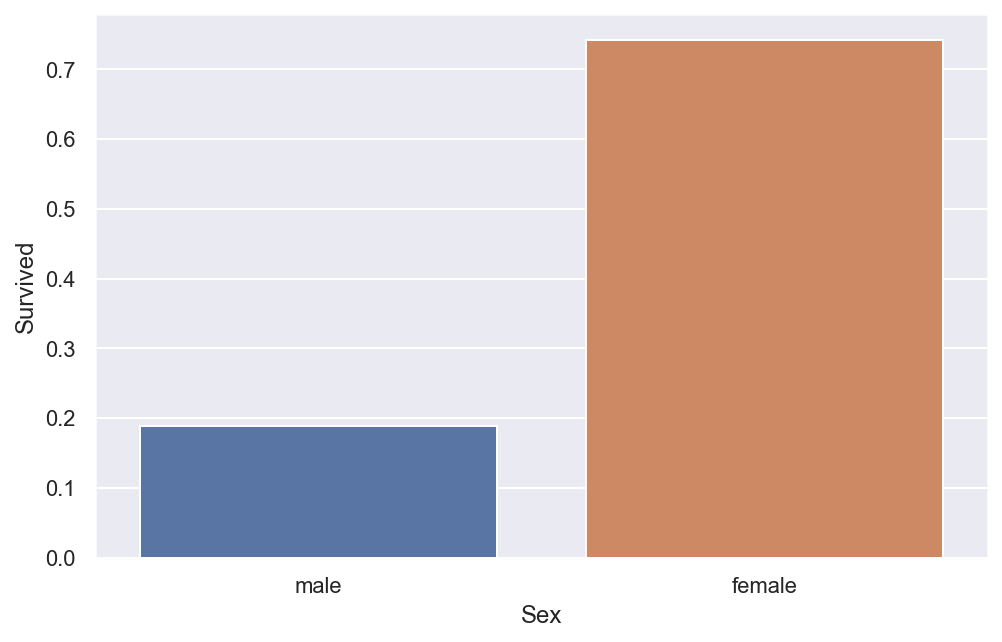

In [87]:
plt.figure(figsize= (8 ,5))#创建画布
sns.barplot(data=titanic_df,x="Sex",y="Survived",ci=None)

plt.show()

In [89]:
titanic_df.pivot_table(values="Survived",index=["Pclass","Sex"],aggfunc=np.mean)

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

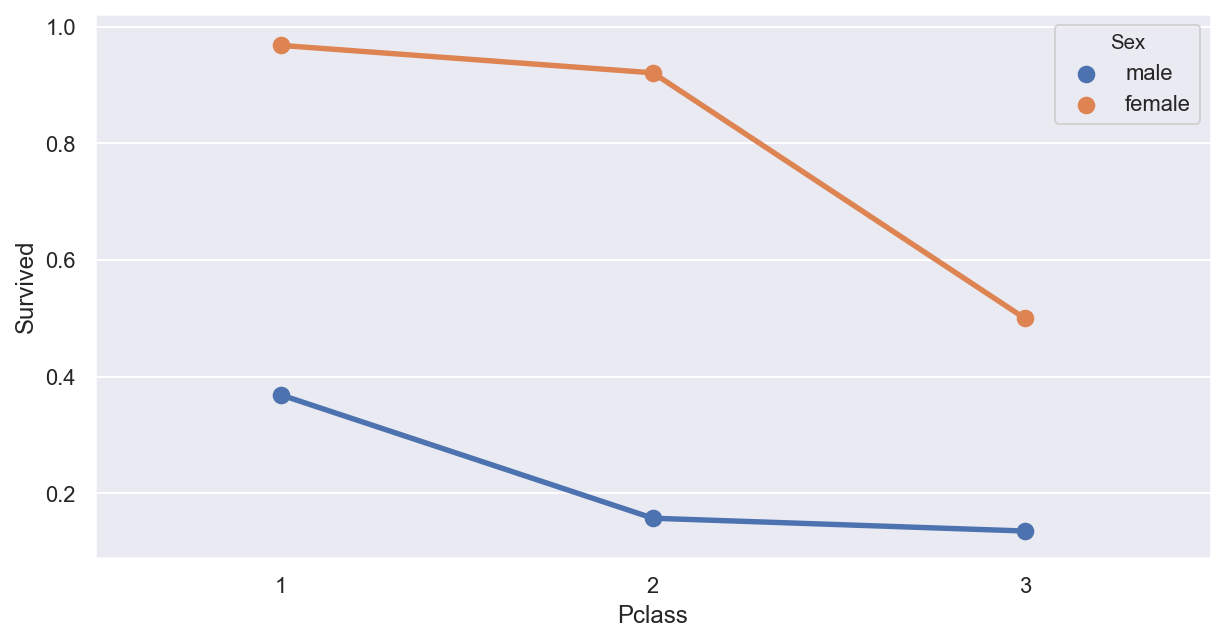

In [91]:
plt.figure(figsize= (10 ,5))
sns.pointplot(data=titanic_df,x="Pclass",y="Survived",hue="Sex",ci=None)
plt.show()

In [5]:
age_median = titanic_df.Age.median()# 计算所有人年龄的中位数

age_median

28.0

In [11]:
titanic_df.Age.fillna(age_median, inplace=True)# 使用fillna填充缺失值，inplace=True表示在原数据titanic_df上直接进行修改

titanic_df.Age.describe()# 查看Age列的描述性统计值


count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [93]:
titanic_df["AgeGroup"]=pd.cut(titanic_df["Age"],5)#将年龄列的数值划分为5等分
titanic_df.AgeGroup.value_counts(sort=False)#查看每个分组有多少人数

(0.34, 16.336]      100
(16.336, 32.252]    523
(32.252, 48.168]    188
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: AgeGroup, dtype: int64

In [94]:
titanic_df.pivot_table(values="Survived",index="AgeGroup",aggfunc=np.mean)

,Survived
AgeGroup,
"(0.34, 16.336]",0.550000
"(16.336, 32.252]",0.344168
"(32.252, 48.168]",0.404255
"(48.168, 64.084]",0.434783
"(64.084, 80.0]",0.090909
